In [189]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils 
import os
import math
import glob

%matplotlib inline

# Resultado

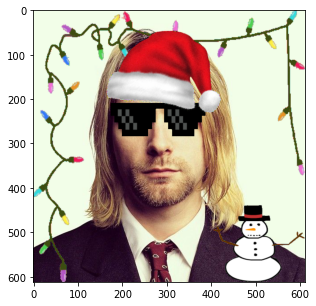

In [188]:
plt.figure(figsize=(10, 5))
img = cv2.imread('./final.png')

plt.imshow(img)

# Modelo

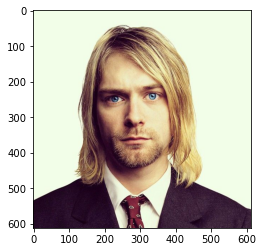

In [190]:
img = cv2.cvtColor(cv2.imread('./curt_kobain.jpg'), cv2.COLOR_BGR2RGB)

plt.imshow(img)

# Adereços

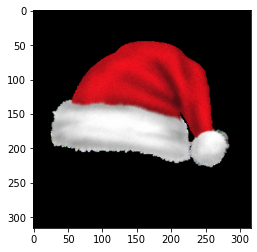

In [191]:
plt.imshow(cv2.cvtColor(cv2.imread('santa_hat.png'), cv2.COLOR_BGR2RGB))

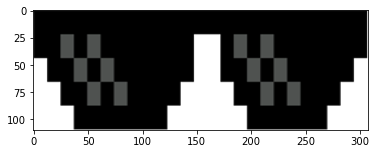

In [192]:
plt.imshow(cv2.imread('deals.png', -1))

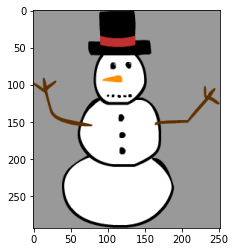

In [193]:
plt.imshow(cv2.cvtColor(cv2.imread('./snowman/snoman-0.png'), cv2.COLOR_BGR2RGB))

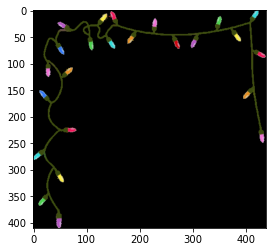

In [194]:
plt.imshow(cv2.cvtColor(cv2.imread('./lights/lights-0.png'), cv2.COLOR_BGR2RGB))

# Manipulação das Imagens

### Gorro de Natal

In [58]:
imgHat = cv2.imread('santa_hat.png', -1)
original_mask_h = imgHat[:, :, 3]
original_mask_inv_h = cv2.bitwise_not(original_mask_h)
imgHat = imgHat[:, :, 0:3]
imgHat = cv2.cvtColor(imgHat, cv2.COLOR_BGR2RGB)
origHatHeight, origHatWidth = imgHat.shape[:2]

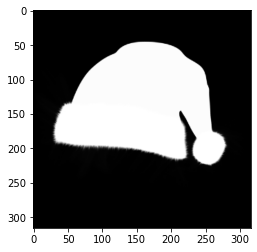

In [195]:
plt.imshow(original_mask_h, cmap='gray')

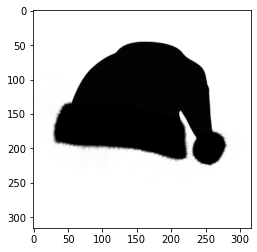

In [196]:
plt.imshow(original_mask_inv_h, cmap='gray')

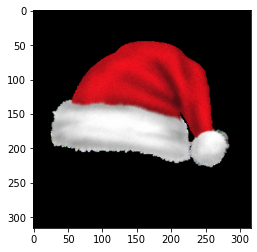

In [197]:
plt.imshow(imgHat)

# Algoritmo

In [35]:
# dlib face key point detector
PREDICTOR_PATH = os.path.join(os.getcwd(), 'shape_predictor_68_face_landmarks.dat')
predictor = dlib.shape_predictor(PREDICTOR_PATH)

# face detector
detector = dlib.get_frontal_face_detector()

# Com canal alfa
imgHat = cv2.imread('santa_hat.png', -1)
original_mask_h = imgHat[:, :, 3]
original_mask_inv_h = cv2.bitwise_not(original_mask_h)
imgHat = imgHat[:, :, 0:3]
imgHat = cv2.cvtColor(imgHat, cv2.COLOR_BGR2RGB)
origHatHeight, origHatWidth = imgHat.shape[:2]

# Oculos com canal alfa
imgGlass = cv2.imread('deals.png', -1)
original_mask_g = imgGlass[:, :, 3]
original_mask_inv_g = cv2.bitwise_not(original_mask_g)
imgGlass = imgGlass[:, :, 0:3]
origGlassHeight, origGlassWidth = imgGlass.shape[:2]

# Várias imagens para criar uma animação na imagem
snowman = [cv2.imread(f, -1) for f in sorted(glob.glob('./snowman/*.png'), key=lambda x: int(x.split('.png')[0].split('-')[1]))]
original_mask_snowman = [s[:, :, 3] for s in snowman]
snowman = [s[:, :, 0:3] for s in snowman]
snowman = [cv2.cvtColor(s, cv2.COLOR_BGR2RGB) for s in snowman]

# Várias imagens para criar uma animação na imagem
lights = [cv2.imread(f, -1) for i in range(10) for f in sorted(glob.glob('./lights/*.png'), key=lambda x: int(x.split('.png')[0].split('-')[1]))]
original_mask_lights = [l[:, :, 3] for l in lights]
lights = [l[:, :, 0:3] for l in lights]
lights = [cv2.cvtColor(l, cv2.COLOR_BGR2RGB) for l in lights]

snowman_ctn = 0
lights_ctn = 0

animation_size = max(len(snowman), len(lights))

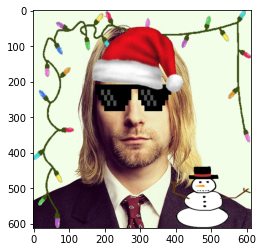

In [201]:
frame = cv2.cvtColor(cv2.imread('./curt_kobain.jpg'), cv2.COLOR_BGR2RGB)

# Backup
_frame = frame.copy()
width, height = frame.shape[0:2]

# transforma em escala cinza
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Capturando as faces
rects = detector(gray, 0)

#### ANIMACAO ####
origHeight, origWidth = snowman[snowman_ctn].shape[0:2]
animImgWidth = width // 4 + 20
animImgHeight = int(animImgWidth * origHeight / origWidth)

anim_img = cv2.resize(snowman[snowman_ctn], (animImgHeight, animImgWidth), interpolation=cv2.INTER_AREA)
anim_mask = cv2.resize(original_mask_snowman[snowman_ctn], (animImgHeight, animImgWidth), interpolation=cv2.INTER_AREA)

maskedImage = cv2.merge((anim_mask, anim_mask, anim_mask))
augmasked = cv2.bitwise_and(anim_img, maskedImage)

imgROI = _frame.copy()
imgROI = imgROI[width - animImgWidth: width, height - animImgHeight: height]
imgROI = cv2.bitwise_and(imgROI, cv2.bitwise_not(maskedImage))

imgROIFinal = cv2.bitwise_or(imgROI, augmasked)
_frame[width - animImgWidth: width, height - animImgHeight: height] = imgROIFinal

######

anim_img = cv2.resize(lights[lights_ctn], (height, width), interpolation=cv2.INTER_AREA)
anim_mask = cv2.resize(original_mask_lights[lights_ctn], (height, width), interpolation=cv2.INTER_AREA)

maskedImage = cv2.merge((anim_mask, anim_mask, anim_mask))
augmasked = cv2.bitwise_and(anim_img, maskedImage)

imgROI = _frame.copy()
imgROI = imgROI[0:width, 0:height]
imgROI = cv2.bitwise_and(imgROI, cv2.bitwise_not(maskedImage))

imgROIFinal = cv2.bitwise_or(imgROI, augmasked)
_frame[0:width, 0:height] = imgROIFinal

snowman_ctn += 1
lights_ctn += 1

if snowman_ctn > len(snowman) - 1:
    snowman_ctn = 0

if lights_ctn > len(lights) - 1:
    lights_ctn = 0
frame = _frame.copy()
#### ANIMACAO ####

for rect in rects:
    shape = predictor(gray, rect)

    #### OCULOS ####
    glassWidth = abs(shape.part(16).x - shape.part(0).x)
    glassHeight = int(glassWidth * origGlassHeight / origGlassWidth)

    glass = cv2.resize(imgGlass, (glassWidth, glassHeight), interpolation=cv2.INTER_AREA)
    mask = cv2.resize(original_mask_g, (glassWidth, glassHeight), interpolation=cv2.INTER_AREA)
    mask_inv = cv2.resize(original_mask_inv_g, (glassWidth, glassHeight), interpolation=cv2.INTER_AREA)

    y1 = int(shape.part(24).y)
    y2 = int(y1 + glassHeight)
    x1 = int(shape.part(27).x - (glassWidth / 2))
    x2 = int(x1 + glassWidth)

    roi1 = frame[y1:y2, x1:x2]
    roi_bg = cv2.bitwise_and(roi1, roi1, mask=mask_inv)
    roi_fg = cv2.bitwise_and(glass, glass, mask=mask)
    frame[y1:y2, x1:x2] = cv2.add(roi_bg, roi_fg)
    #### OCULOS ####

    #### GORRO DE NATAL ####
    hatWidth = int(abs(shape.part(16).x - shape.part(0).x) * 1.5)
    hatHeight = int(hatWidth * origHatHeight / origHatHeight)

    hat = cv2.resize(imgHat, (hatWidth, hatHeight), interpolation=cv2.INTER_AREA)
    mask = cv2.resize(original_mask_h, (hatWidth, hatHeight), interpolation=cv2.INTER_AREA)
    mask_inv = cv2.resize(original_mask_inv_h, (hatWidth, hatHeight), interpolation=cv2.INTER_AREA)

    noseHeight = abs(shape.part(27).y - shape.part(30).y)

    y1 = int(shape.part(27).y - (6 * noseHeight))
    y1 = max(0, y1)

    y2 = int(y1 + hatHeight)

    x1 = int(shape.part(27).x - (hatWidth / 2) * 0.9)
    x1 = max(0, x1)

    x2 = int(x1 + hatWidth)

    if y2 > frame.shape[0] or x2 > frame.shape[1]:
        continue

    maskedHatImage = cv2.merge((mask, mask, mask))
    aughatmasked = cv2.bitwise_and(hat, maskedHatImage)

    imgROI = frame.copy()
    imgROI = imgROI[y1:y2, x1:x2]
    imgROI = cv2.bitwise_and(imgROI, cv2.bitwise_not(maskedHatImage))

    imgROIFinal = cv2.bitwise_or(imgROI, aughatmasked)

    frame[y1:y2, x1:x2] = imgROIFinal
    #### GORRO DE NATAL ####

plt.imshow(frame)

# Exemplos Imagens

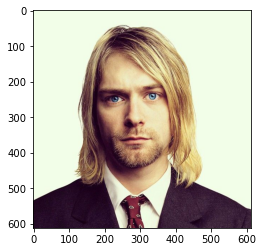

In [198]:
frame = cv2.cvtColor(cv2.imread('./curt_kobain.jpg'), cv2.COLOR_BGR2RGB)

origHeight, origWidth = snowman[snowman_ctn].shape[0:2]
animImgWidth = width // 4 + 20
animImgHeight = int(animImgWidth * origHeight / origWidth)

anim_img = cv2.resize(snowman[snowman_ctn], (animImgHeight, animImgWidth), interpolation=cv2.INTER_AREA)
anim_mask = cv2.resize(original_mask_snowman[snowman_ctn], (animImgHeight, animImgWidth), interpolation=cv2.INTER_AREA)

maskedImage = cv2.merge((anim_mask, anim_mask, anim_mask))
augmasked = cv2.bitwise_and(anim_img, maskedImage)

imgROI = frame.copy()

plt.imshow(imgROI)

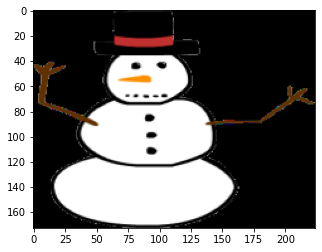

In [199]:
plt.imshow(cv2.bitwise_and(anim_img, maskedImage))

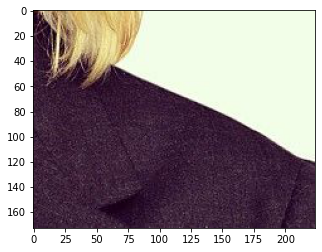

In [200]:
imgROI = imgROI[width - animImgWidth: width, height - animImgHeight: height]

plt.imshow(imgROI)

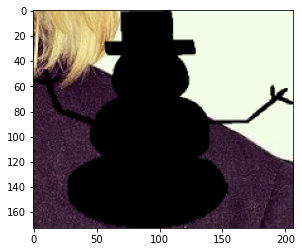

In [118]:
imgROI = cv2.bitwise_and(imgROI, cv2.bitwise_not(maskedImage))

plt.imshow(imgROI)

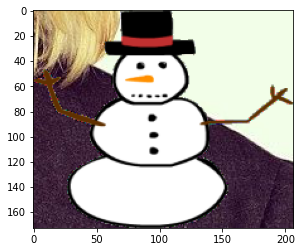

In [124]:
imgROIFinal = cv2.bitwise_or(imgROI, augmasked)

# _frame[width - animImgWidth: width, height - animImgHeight: height] = imgROIFinal

plt.imshow(imgROIFinal)

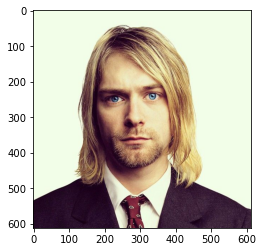

In [134]:
frame = cv2.cvtColor(cv2.imread('./curt_kobain.jpg'), cv2.COLOR_BGR2RGB)

anim_img = cv2.resize(lights[lights_ctn], (height, width), interpolation=cv2.INTER_AREA)
anim_mask = cv2.resize(original_mask_lights[lights_ctn], (height, width), interpolation=cv2.INTER_AREA)

maskedImage = cv2.merge((anim_mask, anim_mask, anim_mask))
augmasked = cv2.bitwise_and(anim_img, maskedImage)

imgROI = frame.copy()
imgROI = imgROI[0:width, 0:height]
imgROI = cv2.bitwise_and(imgROI, cv2.bitwise_not(maskedImage))

imgROIFinal = cv2.bitwise_or(imgROI, augmasked)

plt.imshow(frame)

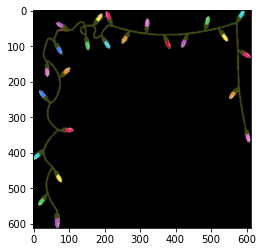

In [137]:
plt.imshow(augmasked)

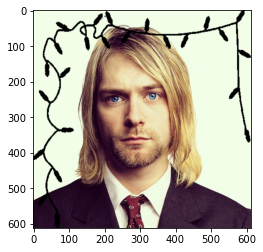

In [135]:
plt.imshow(imgROI)

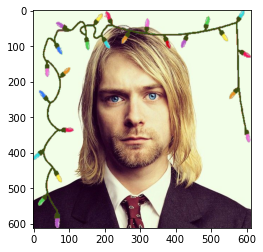

In [136]:
plt.imshow(imgROIFinal)

In [172]:
frame = cv2.cvtColor(cv2.imread('./curt_kobain.jpg'), cv2.COLOR_BGR2RGB)

#### OCULOS ####
glassWidth = abs(shape.part(16).x - shape.part(0).x)
glassHeight = int(glassWidth * origGlassHeight / origGlassWidth)

glass = cv2.resize(imgGlass, (glassWidth, glassHeight), interpolation=cv2.INTER_AREA)
mask = cv2.resize(original_mask_g, (glassWidth, glassHeight), interpolation=cv2.INTER_AREA)
mask_inv = cv2.resize(original_mask_inv_g, (glassWidth, glassHeight), interpolation=cv2.INTER_AREA)

y1 = int(shape.part(24).y)
y2 = int(y1 + glassHeight)
x1 = int(shape.part(27).x - (glassWidth / 2))
x2 = int(x1 + glassWidth)

roi1 = frame[y1:y2, x1:x2]
roi_bg = cv2.bitwise_and(roi1, roi1, mask=mask_inv)
roi_fg = cv2.bitwise_and(glass, glass, mask=mask)

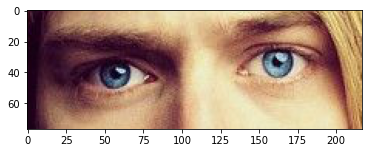

In [174]:
plt.imshow(roi1)

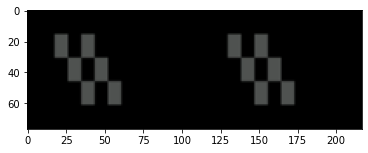

In [175]:
plt.imshow(glass)

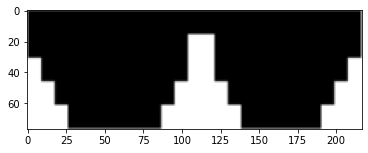

In [157]:
plt.imshow(mask_inv, cmap='gray')

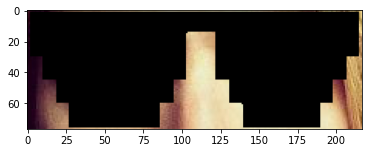

In [158]:
plt.imshow(roi_bg)

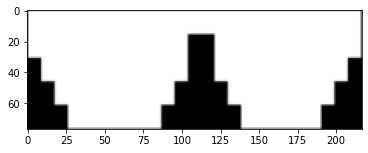

In [160]:
plt.imshow(mask, cmap='gray')

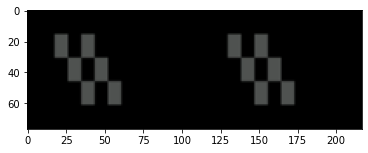

In [148]:
plt.imshow(roi_fg)

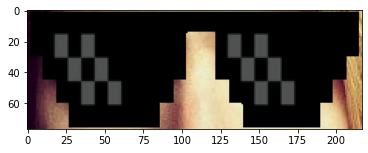

In [145]:
plt.imshow(cv2.add(roi_bg, roi_fg))